Extracting cis/trans

In [2]:
import sys
import gzip
import matplotlib.pyplot as plt
import numpy as np
import cooler
import pandas as pd
import cooltools

In [3]:
def filter_pairs_by_specific_chromosomes(input_file, output_file):
    # List of chromosomes to filter
    target_chromosomes = ["2L_mat","2R_mat", "3L_mat", "3R_mat", "2L_pat", "2R_pat", "3L_pat", "3R_pat","2L_trans", "2R_trans", "3L_trans", "3R_trans"]
    buffer = []
    
    buffer_size = 10000

    with gzip.open(input_file, 'rt') as infile, gzip.open(output_file, 'wt') as outfile:
        for line in infile:
            if line.startswith("#"):  # Process header lines
                # Check if the header line starts with any of the target chromosomes
                if line.startswith("#chromsize"):
                    parts = line.strip().split(" ")
                    if parts[1] in target_chromosomes:
                        buffer.append(line)

                elif line.startswith("#samheader: @SQ"):
                    parts = line.strip().split(":")
                    parts2 = parts[2].strip().split("LN")
                    if parts2[0].strip() in target_chromosomes:
                        buffer.append(line)
                else:
                    buffer.append(line)

                outfile.writelines(buffer)
                buffer=[]
                continue
            parts = line.strip().split("\t")
            # Check if both parts[1] and parts[3] are in the target chromosomes list
            if parts[1] in target_chromosomes and parts[3] in target_chromosomes:
                     
                buffer.append(line)
      
                if len(buffer) >= buffer_size:
                    outfile.writelines(buffer)
                    buffer=[]
        
        outfile.writelines(buffer)

        
        

input_file1 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250703_24L004895_PnM1.filtCisTrans.pairs.gz"
input_file2 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250703_24L004896_PnM2.filtCisTrans.pairs.gz"
input_file3 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250703_24L004897_PnM3.filtCisTrans.pairs.gz"
output_file1 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004895_PnM1.filtCisTrans.ImportantChroms.pairs.gz"
output_file2 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.gz"
output_file3 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.gz"
  
filter_pairs_by_specific_chromosomes(input_file1, output_file1)
filter_pairs_by_specific_chromosomes(input_file2, output_file2)
filter_pairs_by_specific_chromosomes(input_file3, output_file3)

Pairs to cool

(PoreC) erikson@deep22:/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools$ cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes:20000  20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.gz 20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.cool

cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes:20000  20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.gz  20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.cool


cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes:20000 20250708_24L004895_PnM1.filtCisTrans.ImportantChroms.pairs.gz 20250708_24L004895_PnM1.filtCisTrans.ImportantChroms.pairs.cool

cooler merge 20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool 20250708_24L004895_PnM1.filtCisTrans.ImportantChroms.pairs.cool 20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.cool 20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.cool

cooler balance --mad-max 5 --ignore-diags 2 --max-iters 10000 20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool

####################
#Cooler doesn't get balanced and variance grows and never reaches convergence

Plotting unballanced matrix

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


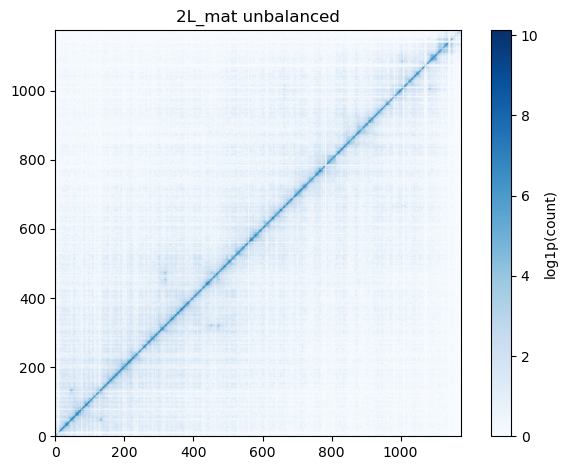

In [7]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool")


mat = clr.matrix(balance=False).fetch("2L_mat")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("2L_mat unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

2L_Pat

Matrix stats:
Max value: 24352
Min value: 0
NaNs present: False
Rows with all zeros: 0
Columns with all zeros: 0


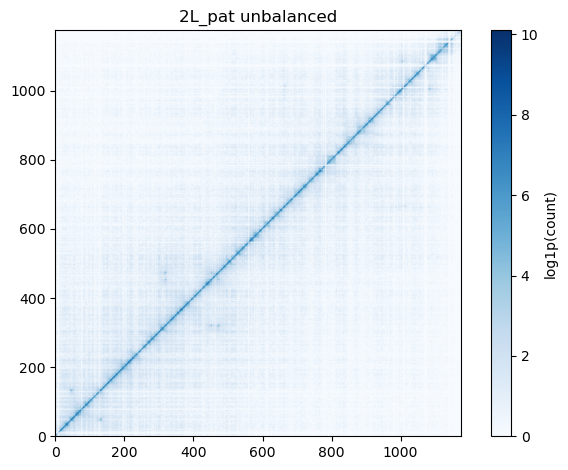

In [12]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool")


mat = clr.matrix(balance=False).fetch("2L_pat")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("2L_pat unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

2L trans

Matrix stats:
Max value: 4936
Min value: 0
NaNs present: False
Rows with all zeros: 0
Columns with all zeros: 0


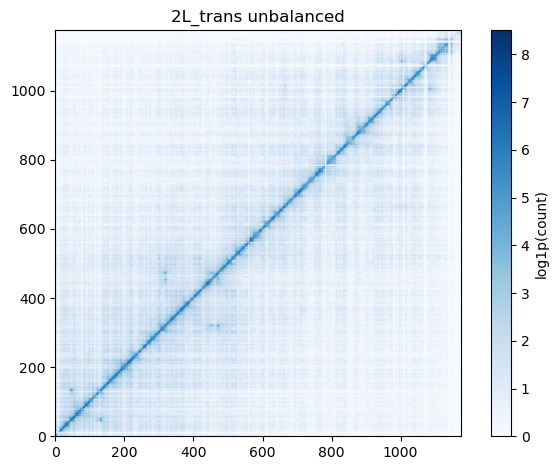

In [13]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool")


mat = clr.matrix(balance=False).fetch("2L_trans")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("2L_trans unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()


=== Per-chromosome coverage summary ===
          total_coverage  mean_coverage  median_coverage  min_coverage  \
chrom                                                                    
2L_mat        22597171.0   19215.281463          18579.0           1.0   
2L_pat        22646616.0   19257.326531          18981.5           5.0   
2L_trans       7681774.0    6532.120748           6263.5           2.0   
2R_mat        21594854.0   17071.030830          16867.0           2.0   
2R_pat        21703030.0   17156.545455          17105.0           5.0   
2R_trans       7883474.0    6231.995257           5991.0           2.0   
3L_mat        25279668.0   17979.849218          18304.0           0.0   
3L_pat        19436251.0   13823.791607          14491.5           0.0   
3L_trans       6998714.0    4977.748222           5036.5           0.0   
3R_mat        40753685.0   25407.534289          25186.0           0.0   
3R_pat        12020593.0    7494.135287           7739.5           0.0 

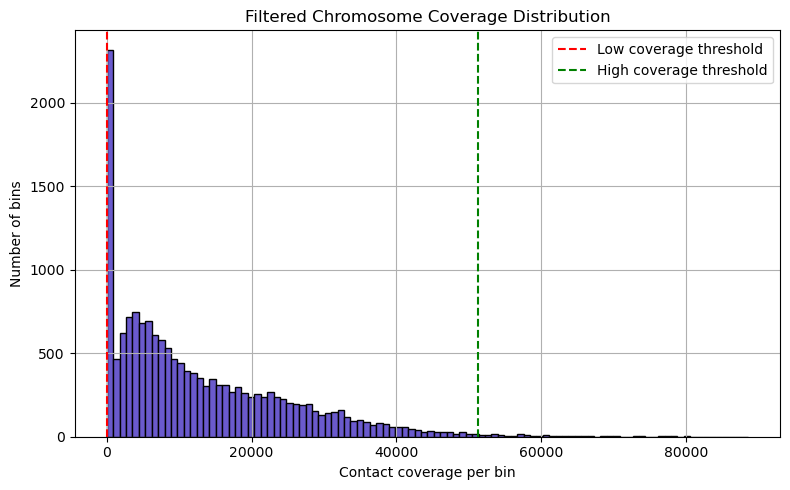

In [16]:
import cooler
import pandas as pd
import matplotlib.pyplot as plt

# Load your .cool file
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool"
clr = cooler.Cooler(cool_path)

# Load bins and pixel data
bins = clr.bins()[:].copy()
pixels = clr.pixels()[:]

# Filter to include only the target chromosomes
target_chromosomes = [
    "2L_mat", "2R_mat", "3L_mat", "3R_mat",
    "2L_pat", "2R_pat", "3L_pat", "3R_pat",
    "2L_trans", "2R_trans", "3L_trans", "3R_trans"
]
bins = bins[bins["chrom"].isin(target_chromosomes)].copy()

# Compute contact coverage per bin
bin1_counts = pixels.groupby("bin1_id")["count"].sum()
bin2_counts = pixels.groupby("bin2_id")["count"].sum()
coverage = bin1_counts.add(bin2_counts, fill_value=0)

# Merge coverage into bins
bins["coverage"] = coverage
bins["coverage"].fillna(0, inplace=True)

# Re-filter again to avoid stray pixels from unlisted chromosomes
bins = bins[bins["chrom"].isin(target_chromosomes)].copy()

# --------------------------
# ✅ Summary stats by chromosome
# --------------------------
summary = bins.groupby("chrom")["coverage"].agg(
    total_coverage="sum",
    mean_coverage="mean",
    median_coverage="median",
    min_coverage="min",
    max_coverage="max",
    low_coverage_bins=lambda x: (x < 10).sum(),
    zero_coverage_bins=lambda x: (x == 0).sum()
)

print("\n=== Per-chromosome coverage summary ===")
print(summary)

# --------------------------
# ✅ Define filtering thresholds
# --------------------------
low_cov_thresh = 10
high_cov_thresh = bins["coverage"].quantile(0.99)  # top 1%

# Flag bins
bins["low_coverage"] = bins["coverage"] < low_cov_thresh
bins["high_coverage"] = bins["coverage"] > high_cov_thresh

# Report
num_low = bins["low_coverage"].sum()
num_high = bins["high_coverage"].sum()

print(f"\nNumber of low coverage bins (< {low_cov_thresh} contacts): {num_low}")
print(f"Number of high coverage bins (> 99th percentile ~ {high_cov_thresh:.2f}): {num_high}")

# --------------------------
# ✅ Plot histogram of coverage
# --------------------------
plt.figure(figsize=(8, 5))
plt.hist(bins["coverage"], bins=100, color="slateblue", edgecolor="black")
plt.axvline(low_cov_thresh, color="red", linestyle="--", label="Low coverage threshold")
plt.axvline(high_cov_thresh, color="green", linestyle="--", label="High coverage threshold")
plt.xlabel("Contact coverage per bin")
plt.ylabel("Number of bins")
plt.title("Filtered Chromosome Coverage Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


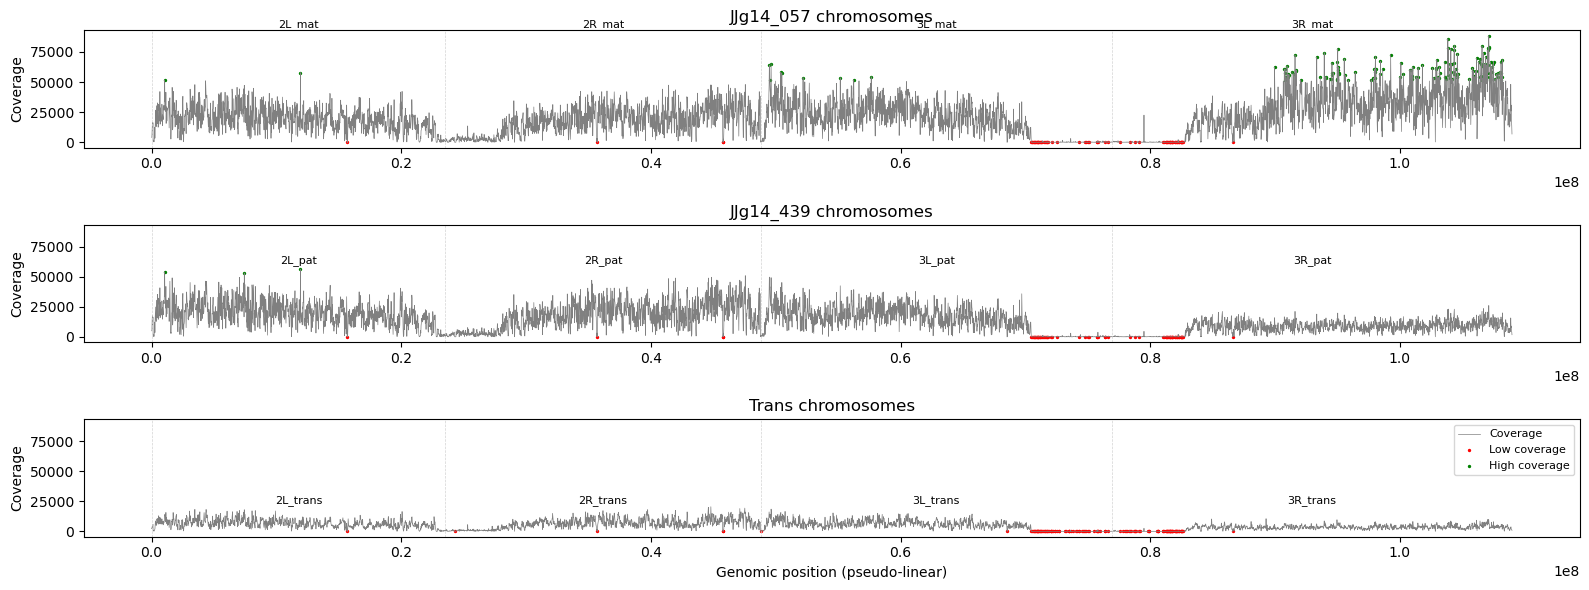

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your chromosome groups
track1_chroms = ["2L_mat", "2R_mat", "3L_mat", "3R_mat"]
track2_chroms = ["2L_pat", "2R_pat", "3L_pat", "3R_pat"]
track3_chroms = ["2L_trans", "2R_trans", "3L_trans", "3R_trans"]

# Assume `bins` is already loaded with required columns
bins["bin_length"] = bins["end"] - bins["start"]

def assign_genomic_positions(df, chrom_order):
    chrom_offsets = {}
    offset = 0
    for chrom in chrom_order:
        chrom_len = df[df["chrom"] == chrom]["bin_length"].sum()
        chrom_offsets[chrom] = offset
        offset += chrom_len
    df = df[df["chrom"].isin(chrom_order)].copy()
    df["genomic_pos"] = df.apply(lambda row: row["start"] + chrom_offsets[row["chrom"]], axis=1)
    return df, chrom_offsets

# Create subsets
track1_bins, track1_offsets = assign_genomic_positions(bins, track1_chroms)
track2_bins, track2_offsets = assign_genomic_positions(bins, track2_chroms)
track3_bins, track3_offsets = assign_genomic_positions(bins, track3_chroms)

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 6), sharey=True, sharex=False)

def plot_track(ax, data, chrom_offsets, title):
    ax.plot(data["genomic_pos"], data["coverage"], color="gray", lw=0.5, label="Coverage")
    ax.scatter(data.loc[data["low_coverage"], "genomic_pos"], data.loc[data["low_coverage"], "coverage"],
               color="red", s=2, label="Low coverage")
    ax.scatter(data.loc[data["high_coverage"], "genomic_pos"], data.loc[data["high_coverage"], "coverage"],
               color="green", s=2, label="High coverage")

    for chrom in chrom_offsets:
        ax.axvline(chrom_offsets[chrom], color="lightgray", linestyle="--", lw=0.5)
        mid = chrom_offsets[chrom] + data[data["chrom"] == chrom]["bin_length"].sum() / 2
        ax.text(mid, data["coverage"].max() * 1.05, chrom, ha="center", va="bottom", fontsize=8)

    ax.set_title(title)
    ax.set_ylabel("Coverage")

plot_track(ax2, track2_bins, track2_offsets, "JJg14_439 chromosomes")
plot_track(ax1, track1_bins, track1_offsets, "JJg14_057 chromosomes")
plot_track(ax3, track3_bins, track3_offsets, "Trans chromosomes")

ax3.set_xlabel("Genomic position (pseudo-linear)")
ax3.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()

Extracting the blacklisted regions

In [30]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool")
bins = clr.bins()[:]
bin_size = clr.info['bin-size']  


# Compute per-bin coverage (sum of contacts for each bin)
matrix = clr.matrix(balance=False)[:]
coverage = matrix.sum(axis=0)  # Sum contacts for each bin


# Define thresholds
low_thresh = np.percentile(coverage[coverage > 0], 2)  # 2nd percentile (excluding 0s)
high_thresh = np.percentile(coverage, 99)              # 99th percentile (extreme high)

# Mask bins
low_coverage_mask = (coverage <= low_thresh) | (coverage == 0)
high_coverage_mask = (coverage >= high_thresh)

# Combine masks
blacklist_mask = low_coverage_mask | high_coverage_mask
blacklisted_bins = bins[blacklist_mask]

# Export to BED
bed = blacklisted_bins[['chrom', 'start', 'end']]
bed.to_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_drosophila_blacklist_cisTrans.bed", sep='\t', header=False, index=False)

# Optional: Print stats
print(f"Total bins: {len(bins)}")
print(f"Low coverage bins: {np.sum(low_coverage_mask)}")
print(f"High coverage bins: {np.sum(high_coverage_mask)}")
print(f"Total blacklisted bins: {len(bed)}")

Total bins: 16353
Low coverage bins: 361
High coverage bins: 164
Total blacklisted bins: 525


Trying to balance by using the blacklisted regions, doesn't converge...

cooler balance 20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool  --blacklist 20250708_drosophila_blacklist_cisTrans.bed --mad-max 5 --min-nnz 10 --max-iters 10000 --tol 1e-4




Trying 100kb bins

cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes:100000  20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.gz 20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.100kb.cool

cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes:100000  20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.gz 20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.100kb.cool

cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes:100000  20250708_24L004895_PnM1.filtCisTrans.ImportantChroms.pairs.gz 20250708_24L004895_PnM1.filtCisTrans.ImportantChrom.pairs.100kb.cool

cooler merge  20250708_filtCisTrans.ImportantChroms.100kb.cool 20250708_24L004895_PnM1.filtCisTrans.ImportantChrom.pairs.100kb.cool 20250708_24L004896_PnM2.filtCisTrans.ImportantChrom.pairs.100kb.cool 20250708_24L004897_PnM3.filtCisTrans.ImportantChrom.pairs.100kb.cool


cooler balance --mad-max 5 --ignore-diags 2 --max-iters 10000 20250708_filtCisTrans.ImportantChroms.100kb.cool 

#No, variance keeps on growing

INFO:cooler.balance:variance is 1.9363898459285908e+43
INFO:cooler.balance:variance is 7.581285471192113e+42
INFO:cooler.balance:variance is 2.2856619636512947e+43
ERROR:cooler.cli.balance:Iteration limit reached without convergence
ERROR:cooler.cli.balance:Storing final result. Check log to assess convergence.


INFO:root:creating a Pool of 2 workers


/tmp/ipykernel_595754/287778680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


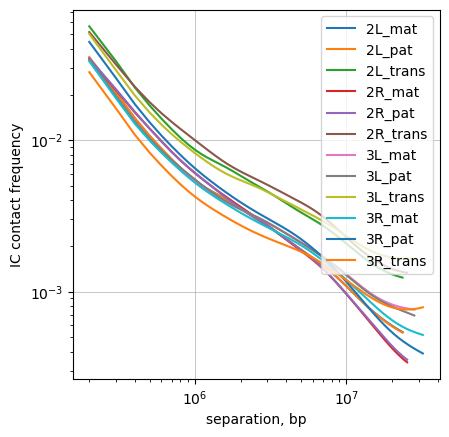

In [33]:
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_filtCisTrans.ImportantChroms.100kb.cool")

# compute P(s) curves
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
    )

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

# plot
fig, ax = plt.subplots(1,1)

for region in chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

ax.legend(chromsizes['chrom'], loc='upper right')

Plot P(s) plots with unbalanced matrix, I can't plot unbalaced matrixes with cooltools

INFO:root:creating a Pool of 2 workers
/tmp/ipykernel_595754/3197731218.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


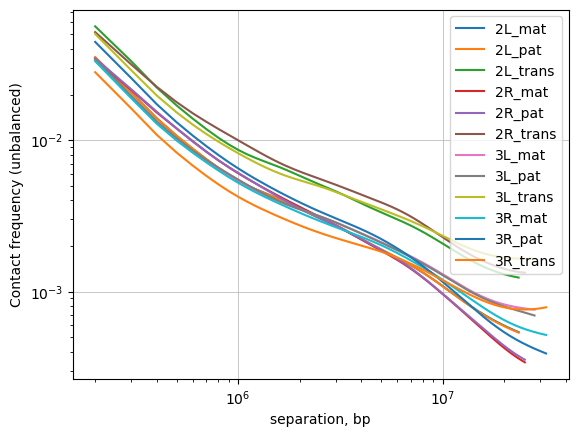

In [39]:
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.CisTrans.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_filtCisTrans.ImportantChroms.100kb.cool")

cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
)

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

fig, ax = plt.subplots(1, 1)

for region in chromsizes['chrom']:
    region_data = cvd_smooth_agg[cvd_smooth_agg['region1'] == region]
    
    # Filter out short distances
    region_data.loc[region_data['dist'] < 2, 'balanced.avg.smoothed'] = np.nan

    ax.loglog(
        region_data['dist_bp'],
        region_data['balanced.avg.smoothed'],
        label=region
    )

ax.set(
    xlabel='separation, bp',
    ylabel='Contact frequency (unbalanced)'
)
ax.set_aspect('auto')  # Use 'auto' if the axes are wildly different
ax.grid(True, lw=0.5)
ax.legend(loc='upper right')



Plot Balanced and unbalanced matrix

Matrix stats:
Max value: 17342
Min value: 0
NaNs present: False
Rows with all zeros: 0
Columns with all zeros: 0


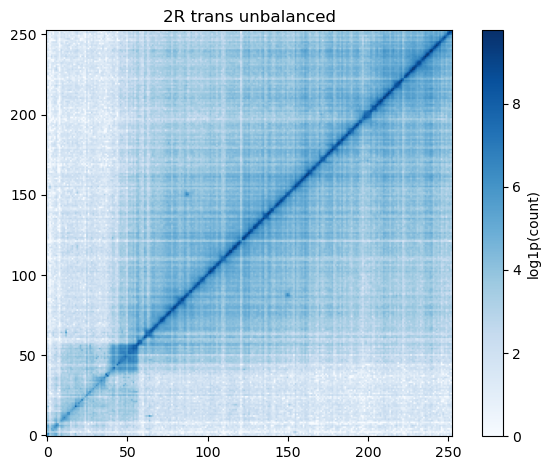

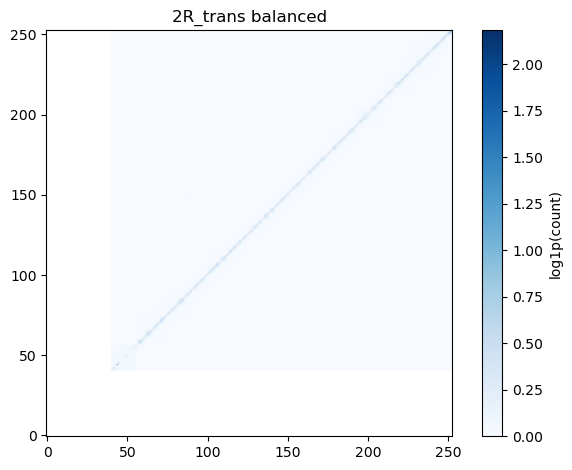

In [35]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_filtCisTrans.ImportantChroms.100kb.cool")


mat = clr.matrix(balance=False).fetch("2R_trans")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("2R trans unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

mat = clr.matrix(balance=True).fetch("2R_trans")
mat = np.clip(mat, 0, np.percentile(mat, 99))  

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("2R_trans balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

Did the balancing colapsed the signal

(array([11., 24., 40., 29., 28., 21., 19., 10.,  8.,  3.,  4.,  2.,  2.,
         2.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00432672, 0.00525473, 0.00618274, 0.00711075, 0.00803876,
        0.00896677, 0.00989477, 0.01082278, 0.01175079, 0.0126788 ,
        0.01360681, 0.01453482, 0.01546283, 0.01639084, 0.01731884,
        0.01824685, 0.01917486, 0.02010287, 0.02103088, 0.02195889,
        0.0228869 , 0.02381491, 0.02474291, 0.02567092, 0.02659893,
        0.02752694, 0.02845495, 0.02938296, 0.03031097, 0.03123898,
        0.03216698, 0.03309499, 0.034023  , 0.03495101, 0.03587902,
        0.03680703, 0.03773504, 0.03866305, 0.03959106, 0.04051906,
        0.04144707, 0.04237508, 0.04330309, 0.0442311 , 0.04515911,
        0.04608712, 0.04701513, 0.04794313, 0.04887114, 0.04979915,
        0.05072716]),
 <BarContainer

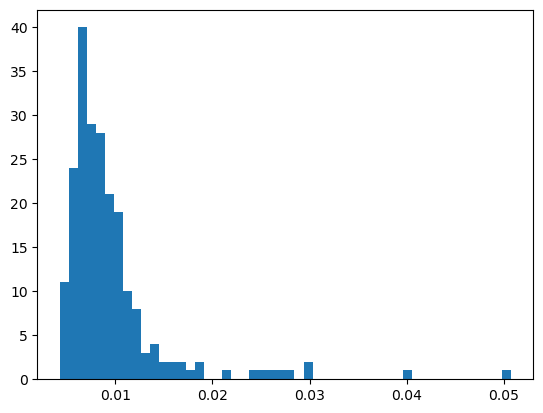

In [36]:
plt.hist(clr.bins().fetch("2R_trans")["weight"].dropna(), bins=50)

Doing the 20kb again even though we know it doesn't converge

(PoreC) erikson@deep22:/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools$ cooler balance --mad-max 5 --ignore-diags 2 --max-iters 10000  --blacklist 20250708_drosophila_blacklist_cisTrans.bed 20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool


INFO:root:creating a Pool of 2 workers
/tmp/ipykernel_595754/2305662963.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


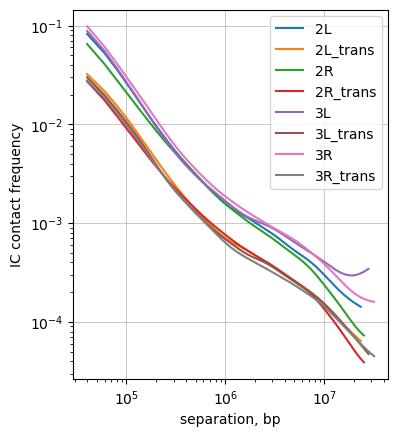

In [25]:
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.chromsizes.reduced"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/24L004895_PnM1.filt.pairs.cool")

# compute P(s) curves
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
    )

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

# plot
fig, ax = plt.subplots(1,1)

for region in chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

ax.legend(chromsizes['chrom'], loc='upper right')

In [29]:
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/dm6_genome.reduced.chromsizes.reduced"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/24L004896_PnM2.filt.pairs.cool")

# compute P(s) curves
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
    )

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

# plot
fig, ax = plt.subplots(1,1)

for region in chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

ax.legend(chromsizes['chrom'], loc='upper right')

INFO:root:creating a Pool of 2 workers


ValueError: cooler is not balanced, orbalancing weight weight is not available in the cooler.Pass clr_weight_name=None explicitly to calculate expected on raw counts